<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/SigmoidFunction-LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Classifying if a particular aged person would like to buy insurance data or not

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
import matplotlib.pyplot as plt

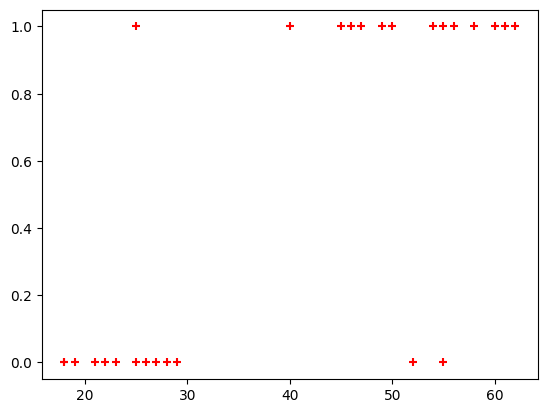

In [5]:
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'red')

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size = 0.2)
len(X_train)

21

In [13]:
len(X_test)

6

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
model.predict(X_test)

array([0, 1, 1, 0, 0, 1])

In [17]:
y_test

12    0
8     1
23    1
19    0
11    0
24    1
Name: bought_insurance, dtype: int64

In [20]:
model.predict_proba(X_test)

array([[0.79920397, 0.20079603],
       [0.06663274, 0.93336726],
       [0.33479432, 0.66520568],
       [0.91798507, 0.08201493],
       [0.78013322, 0.21986678],
       [0.22080207, 0.77919793]])

In [22]:
print(model.predict([[5]]))
model.predict_proba([[5]])

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98032948, 0.01967052]])

In [23]:
model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [28]:
model.predict_proba([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.06345626e-04, 9.99093654e-01]])

In [29]:
model.coef_  #indicates the value of m in y = mx + b equation

array([[0.11488369]])

In [30]:
model.intercept_ #indicates the value of b in y = mx + b equation

array([-4.48318632])

**Let's define sigmoid function and do math with hand**

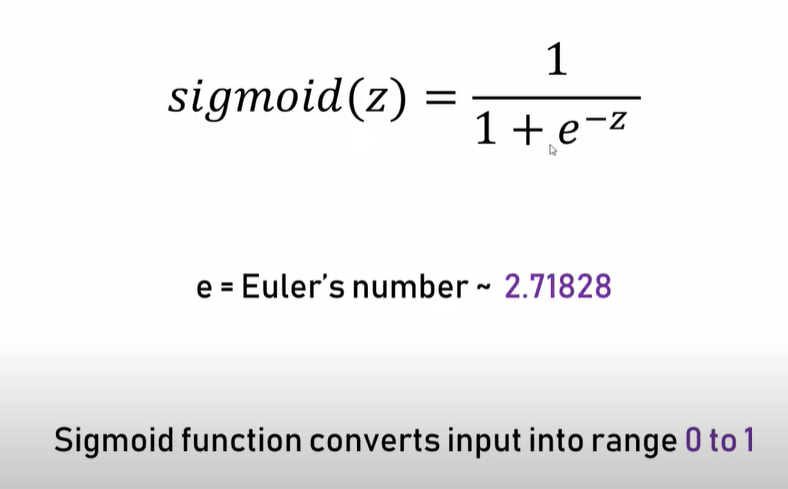

In [31]:
import math
def sigmoid(x):
  return 1/(1 + math.exp(-x))

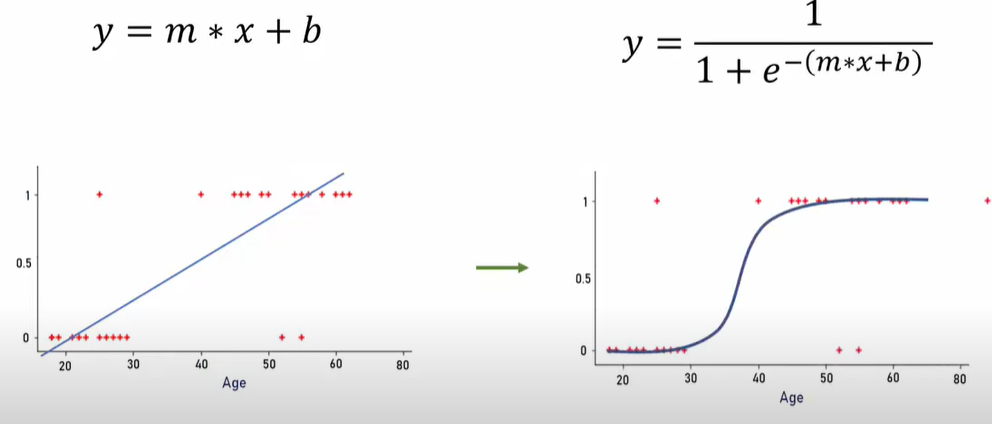

In [37]:
def prediction_function(age):
  z = model.coef_ * age + model.intercept_
  y = sigmoid(z)
  return y

In [38]:
age = 40
prediction_function(40)

<ipython-input-31-4532509bcc53>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1 + math.exp(-x))


0.5280110012254643

**0.52 is greater than 0.5 which means a person with age 40 will buy insurance**





In [39]:
model.score(X_test, y_test)

1.0